In [1]:
import sys

sys.path.append('./utils/')
import numpy as np
import cv2
import gdal
import loadcoraldata_utils as coralutils
from matplotlib import pyplot as plt

%matplotlib notebook

Using TensorFlow backend.


In [20]:
from importlib import reload
reload(coralutils)

imgpath = 'C:/NeMO-Net Data/Fiji Raw Imagery/Cicia/052985603010_01/052985603010_01_P001_MUL/10AUG17222153-M2AS_R3C2-052985603010_01_P001_rad_solar_corrected.TIF'
#tfwpath = '../Images/BTPB-WV2-2012-15-8Band-mosaic-GeoTiff-Sample-AOI/BTPB-WV2-2012-15-8Band-mosaic-GeoTiff-Sample-AOI.tfw'
truthpath = 'C:/NeMO-Net Data/KSLOF-CICIA-FIJI/Cicia_Habitat_classes_raster_KSLOF.tif'
output_trainpath = '../Images/Fiji_Training_Patches_256/'
output_trainrefpath = '../Images/Fiji_TrainingRef_Patches_256/'
output_trainfilename = 'rastertrain.txt'
output_validpath = '../Images/Fiji_Valid_Patches_256/'
output_validrefpath = '../Images/Fiji_ValidRef_Patches_256/'
output_validfilename = 'rastervalid.txt'

Cicia1 = coralutils.CoralData(imgpath,load_type="raster", Truthpath=truthpath)
# print(Cicia1.geotransform)

<IPython.core.display.Javascript object>


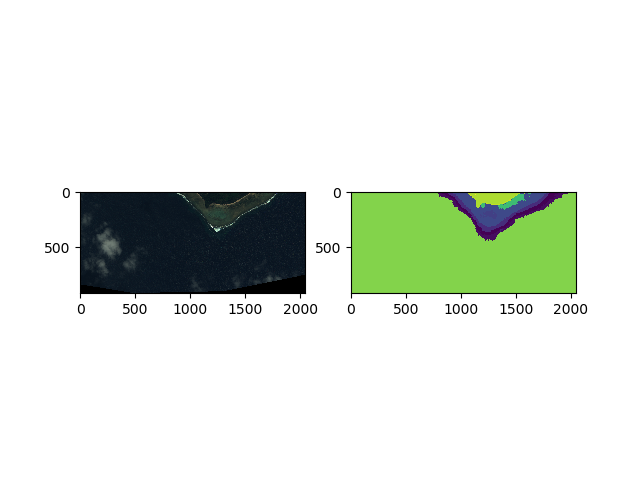

In [21]:
max_R = np.max(Cicia1.image[:,:,4])
max_G = np.max(Cicia1.image[:,:,2])
max_B = np.max(Cicia1.image[:,:,1])
Cicia1_RGB= np.rollaxis(np.asarray([1/max_R*Cicia1.image[:,:,4], 1/max_G*Cicia1.image[:,:,2], 1/max_B*Cicia1.image[:,:,1]]),0,3)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(Cicia1_RGB)
plt.subplot(1,2,2)
plt.imshow(Cicia1.truthimage)
plt.show()